In [1]:
import cv2
import numpy as np
from PIL import Image

import os
import matplotlib.pyplot as plt

from skimage.feature import peak_local_max
from skimage.morphology import watershed

from scipy import ndimage

## 4 - Implement affine transformation from scratch

In [3]:
working_dir = 'data/'
files = next(os.walk(working_dir))[2]

In [4]:
images = []
for file in files:
    #img = Image.open(os.path.join(working_dir, file))
    
    img = cv2.imread(os.path.join(working_dir, file))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    images.append(img)

In [5]:
def visualize(images):
    for img in images:
        plt.figure(figsize=(15, 15))
        plt.imshow(img, cmap='gray')
        plt.axis('off')

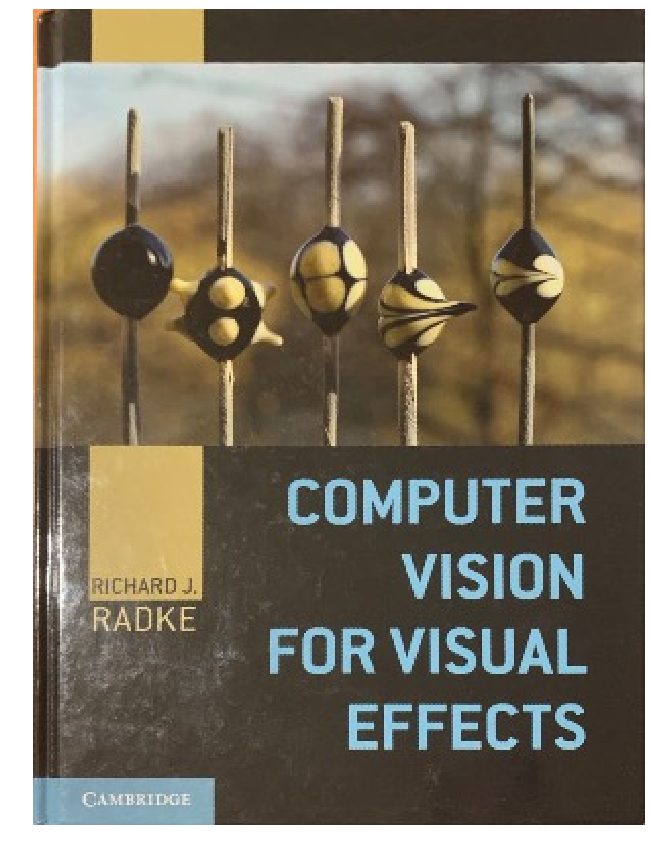

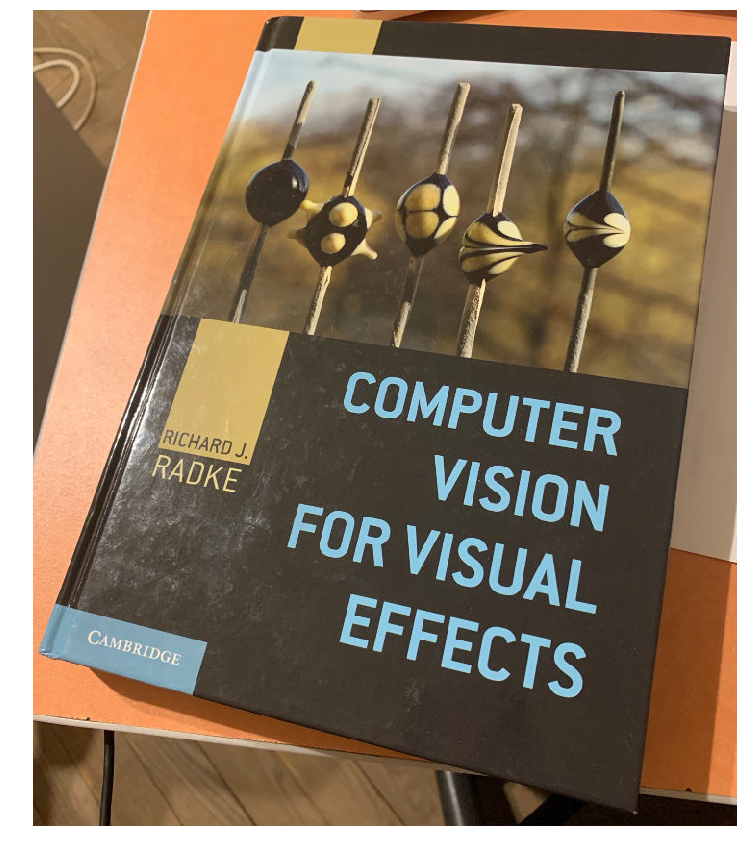

In [6]:
visualize(images)

In [7]:
dst = np.array([(0, 299), (0, 0), (399, 0)]).astype(np.float32)
src = np.array([(8, 665), (245, 11), (723, 28)]).astype(np.float32)

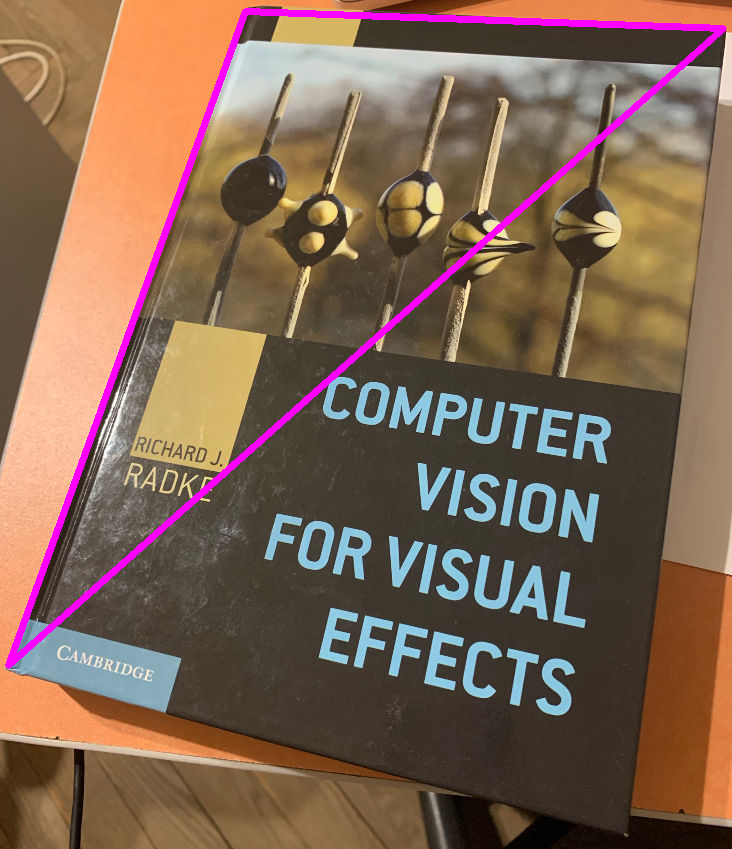

In [13]:
Image.fromarray(cv2.polylines(images[1], np.int32([src]), 1, (255, 0, 255), 5))

In [14]:
matrix = cv2.getAffineTransform(src, dst)

In [15]:
matrix

array([[ 8.24106796e-01,  2.98644206e-01, -2.05191251e+02],
       [-1.60528801e-02,  4.51369216e-01, -1.03210576e+00]])

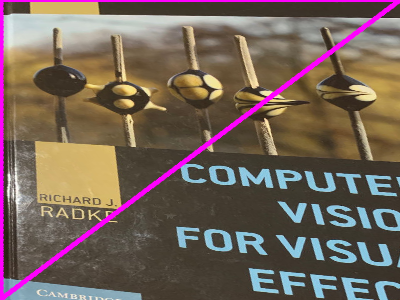

In [16]:
output = cv2.warpAffine(images[1], matrix, images[0].shape[:2])
Image.fromarray(output)

In [17]:
def affine(src, dst):

    dst_mod = np.concatenate((dst, np.ones((1, 3)).T), axis=1)
    src_mod = np.concatenate((src, np.ones((1, 3)).T), axis=1)
    
    # solve matrix equation
    matrix = dst_mod.T @ np.linalg.inv(src_mod.T)
    matrix = matrix[:-1]
    
    return matrix

In [18]:
affine_matrix = affine(src, dst)

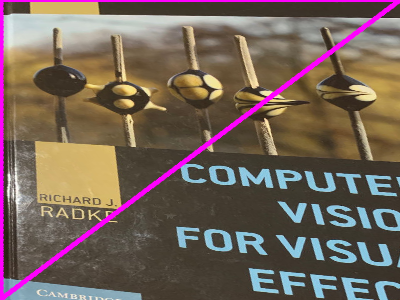

In [19]:
output = cv2.warpAffine(images[1], affine_matrix, images[0].shape[:2])
Image.fromarray(output)

In [20]:
np.linalg.norm(affine_matrix - matrix)

8.528395519041156e-14